# Sesión 6: Breve introducción a Machine Learning con Scikit-learn



Referencias

[Artificial intelligence MIT Course](https://www.youtube.com/watch?v=_PwhiWxHK8o)

[Kaggle - Elie Kawerk Glass Classification](https://www.kaggle.com/eliekawerk/glass-type-classification-with-machine-learning)

[Random Forest](https://towardsdatascience.com/random-forest-3a55c3aca46d)
Data

[UCI ML Repository - Glass](https://archive.ics.uci.edu/ml/datasets/Glass+Identification)


## Nociones de Machine Learning 

ML
Supervisado / No supervisado
Train/Test

Cross Validation


Machine Learning (ML) es un campo científico que mezcla diversas disciplicas que incluyen, entre otras, la ciencia de computación, estadística, ciencia cognitiva, ingenieria, teoría de optimización.

Hay numerosas aplicaciones de ML, pero destaca su uso en minería de datos. 

ML se divide en dos amplias categorias que son el 
 - **aprendizaje no supervisado** que consiste en técnicas que no hacen uso de la variable a predecir, o de la que se quiere obtener información.
 
 
 - **aprendizaje supervisado** que consiste en técnicas que hacen uso de la variable/s a predecir a la hora de *entrenar* los algoritmos. Unos datos se útilizan para entrenar, y otros para validar. Con esto se intenta evitar el ampliamente conocido efecto de *overfiting*.


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import collections
from time import time


# SKLEARN
import sklearn
# > Preprocesado
from sklearn.preprocessing import StandardScaler
# > Reducción de dimensionalidad por componentes principales
from sklearn.decomposition import PCA
# > Clustering
from sklearn.cluster import KMeans

# > Clasificadores
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# > Selección de modelo
from sklearn.model_selection import train_test_split, KFold , StratifiedKFold,\
                                     cross_val_score, GridSearchCV, \
                                     learning_curve, validation_curve
# > Definir metricas para evaluar el desempeño de clasificadores
from sklearn.metrics import make_scorer
# >> Tipicos scorers
from sklearn.metrics import accuracy_score, recall_score, precision_score 

## Scikit-learn

### Comprobar la instalación

Comprobamos la versión de sklearn, debe ser 0.23.2 o superior.

In [49]:
print(sklearn.__version__)

0.23.2


In [50]:
#pip install scikit-learn --upgrade
# Y reinicia el Kernel

### Aprendizaje no supervisado

In [51]:
nombres_columnas = ['Id', 'RI', 'Na', 'Mg','Al','Si','K','Ca','Ba','Fe','Type']
                
glass_type_dict = {1: 'building windows, float processed',
                   2: 'building windows, non-float processed',
                   3: 'vehicle windows',
                   5: 'containers',
                   6: 'tableware',
                   7: 'headlamps'
                  }
glass_code_dict = {1:'BW-FP', 2:'BW-NFP', 3:'VW', 5:'C', 6:'TW', 7:'HL'}
glass = pd.read_csv('Data/Glass/GlassCSV.csv', names = nombres_columnas)


In [52]:
glass = glass.set_index('Id')
glass['Type_str'] = list(map(lambda x: glass_code_dict[x], glass['Type']))

In [53]:
columns_sorted = sorted(glass.columns)
input_columns = glass.drop(['Type', 'Type_str'], axis=1).columns.to_list()

In [54]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_str
Id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,BW-FP
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,BW-FP
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,BW-FP
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,BW-FP
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,BW-FP


# Análisis descriptivo

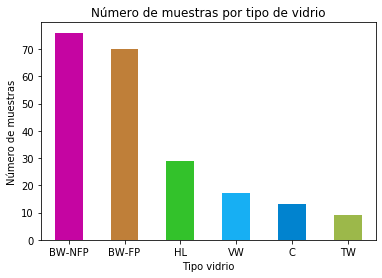

In [55]:
np.random.seed(10)
glass.groupby(by='Type_str').count().iloc[:,0].sort_values(ascending=False).plot.bar(color=np.random.random_sample((6,3)))
plt.xticks(rotation=0)
plt.xlabel('Tipo vidrio')
plt.ylabel('Número de muestras')
plt.title('Número de muestras por tipo de vidrio')
plt.show()

In [56]:
glass.drop('Type', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


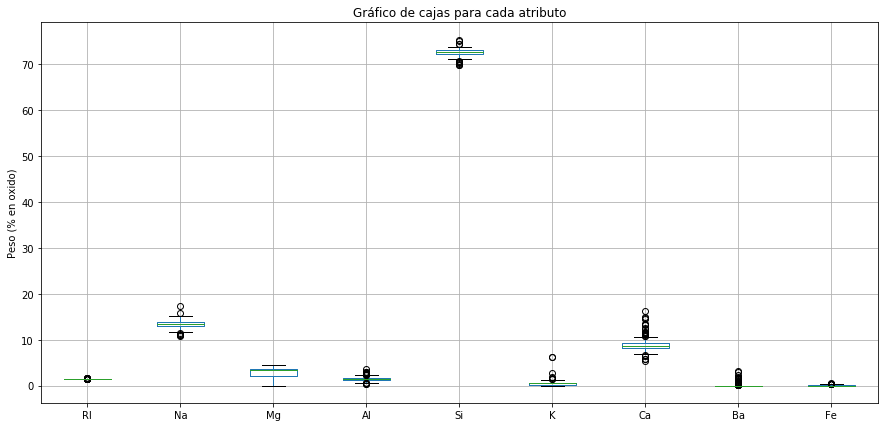

In [57]:
plt.figure(figsize=(15,7))
glass[input_columns].boxplot()
plt.title('Gráfico de cajas para cada atributo')
plt.ylabel('Peso (% en oxido)')
plt.show()

C:\Users\win10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds


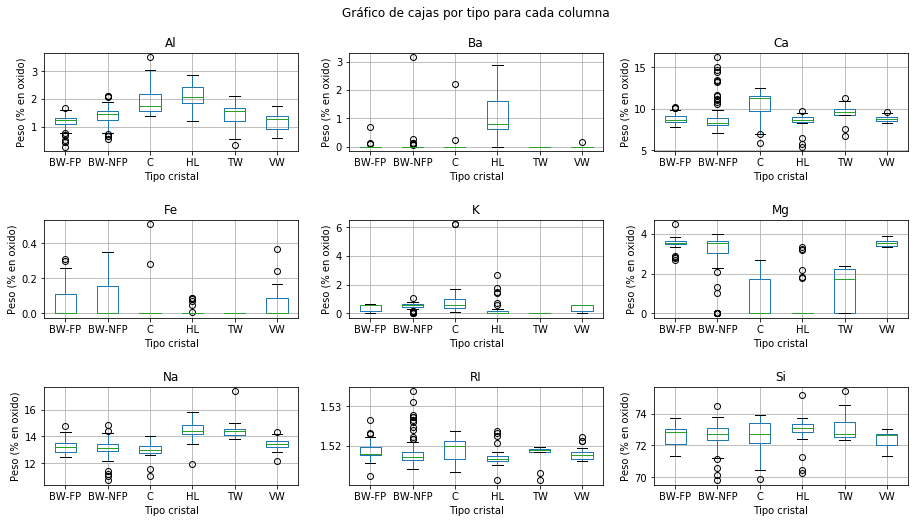

In [84]:
fig, ax = plt.subplots(3,3,figsize=(15,8), gridspec_kw = {'hspace':0.7})
glass[input_columns+['Type_str']].boxplot(by='Type_str', ax=ax)
[ax[ii,jj].set_ylabel('Peso (% en oxido)') for ii,jj in itertools.product(range(3), range(3)) if columns_sorted[3*ii+jj]!='RI']
[ax[ii,jj].set_xlabel('Tipo cristal') for ii,jj in itertools.product(range(3), range(3))]

plt.suptitle('Gráfico de cajas por tipo para cada columna')
plt.show()


## Reescalado de las variables

In [59]:
X = glass.drop(['Type', 'Type_str'], axis=1).to_numpy()
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [60]:
# Usamos el scalado estandar (Z-score: z_i=(x_i-media)/desviacion_estandar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\win10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds


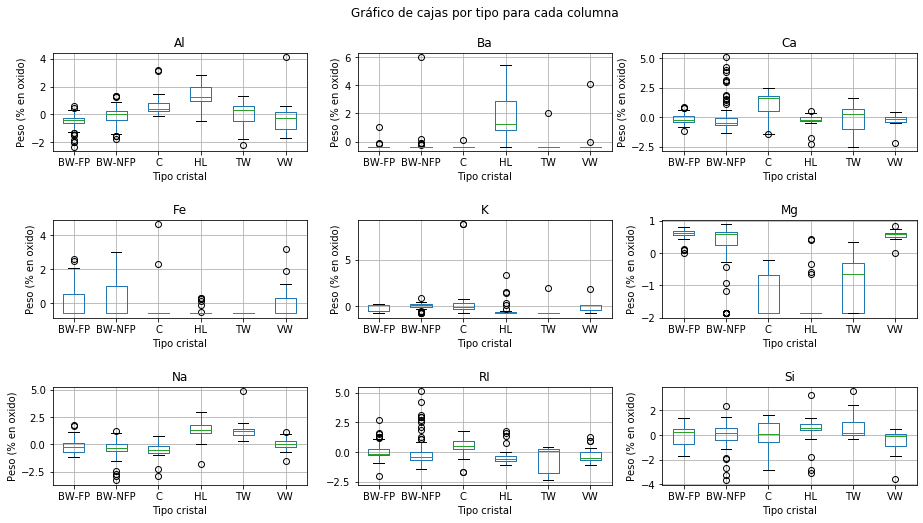

In [61]:
glass_norm = pd.DataFrame(X_scaled, columns=input_columns)
glass_norm.loc[:, 'Type_str'] = glass['Type_str']

fig, ax = plt.subplots(3,3,figsize=(15,8), gridspec_kw = {'hspace':0.7})
glass_norm.boxplot(by='Type_str', ax=ax)
[ax[ii,jj].set_ylabel('Peso (% en oxido)') for ii,jj in itertools.product(range(3), range(3)) if columns_sorted[3*ii+jj]!='RI']
[ax[ii,jj].set_xlabel('Tipo cristal') for ii,jj in itertools.product(range(3), range(3))]

plt.suptitle('Gráfico de cajas por tipo para cada columna')
plt.show()


## Reducción de la dimensionalidad: Principal Component Analysis (PCA)

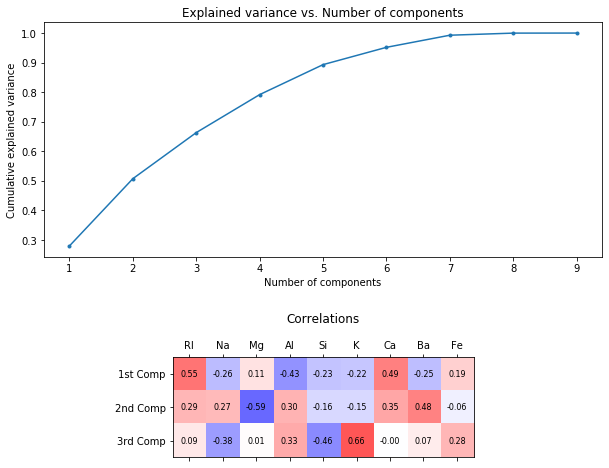

In [303]:
###########################
# PCA
###########################


fig, ax = plt.subplots(2,1, figsize=(10,8), gridspec_kw={'height_ratios':[0.7,0.3], 'hspace':0.6})

pca = PCA().fit(X_scaled)
ax[0].plot(np.arange(1,len(pca.explained_variance_ratio_)+1),   
    np.cumsum(pca.explained_variance_ratio_), marker=".")
ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Cumulative explained variance')
ax[0].set_title("Explained variance vs. Number of components")

# PC explained variance 
pca3 = PCA(n_components=3)
pca3.fit(X_scaled)
# Component meaning
ax[1].matshow(pca3.components_, cmap="bwr",vmin=-1,vmax=1)
ax[1].set_yticks(range(3))
ax[1].set_yticklabels(['1st Comp','2nd Comp', '3rd Comp'], fontsize=10)
#plt.colorbar()
ax[1].set_xticks(range(len(input_columns)), )
ax[1].set_xticklabels(input_columns, rotation=0,ha='center')
ax[1].set_ylim(2.5,-0.5)
[ax[1].text(jj,ii, f'{pca3.components_[ii,jj]:1.2f}', va='center', ha='center', fontsize=8) for ii, jj in itertools.product(range(3), range(len(input_columns)))]
ax[1].set_title('Correlations', pad=30)
plt.show()

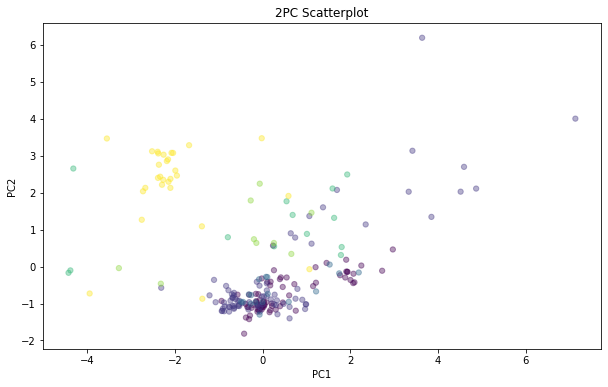

In [305]:

# 2PC plot
# > Performe PCA
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
X2 = pca2.transform(X_scaled)
# > Plot dimensionality reduction to 2PCs
# >> Scatter all points, with the corresponding color. We set 
#      transparency to 20%
plt.figure(figsize=(10,6))
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.4, marker="o", s=28,c=glass['Type'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("2PC Scatterplot")
plt.show()

## Clustering


### KMeans


In [165]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_scaled)
cluster_index = kmeans.labels_

collections.Counter(kmeans.labels_)


glass['cluster_KMeans'] = cluster_index


In [63]:

def print_cluster_purity(data_pd, cluster_col):

    for cluster_idx, cluster_pd in glass.groupby(by=cluster_col):

        print(f'Cluster {cluster_idx}')
        print('\t',str(collections.Counter(cluster_pd['Type'])).replace('Counter',''))

print_cluster_purity(glass, 'cluster_KMeans')   

Cluster 0
	 ({2: 20, 1: 15, 3: 3, 5: 2})
Cluster 1
	 ({5: 2})
Cluster 2
	 ({7: 24, 5: 1, 6: 1})
Cluster 3
	 ({2: 7})
Cluster 4
	 ({1: 17, 2: 7, 6: 7, 5: 5, 7: 3, 3: 2})
Cluster 5
	 ({2: 42, 1: 38, 3: 12, 5: 3, 7: 2, 6: 1})


## Agglomerative Clustering

In [64]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X_scaled)
clustering

AgglomerativeClustering()

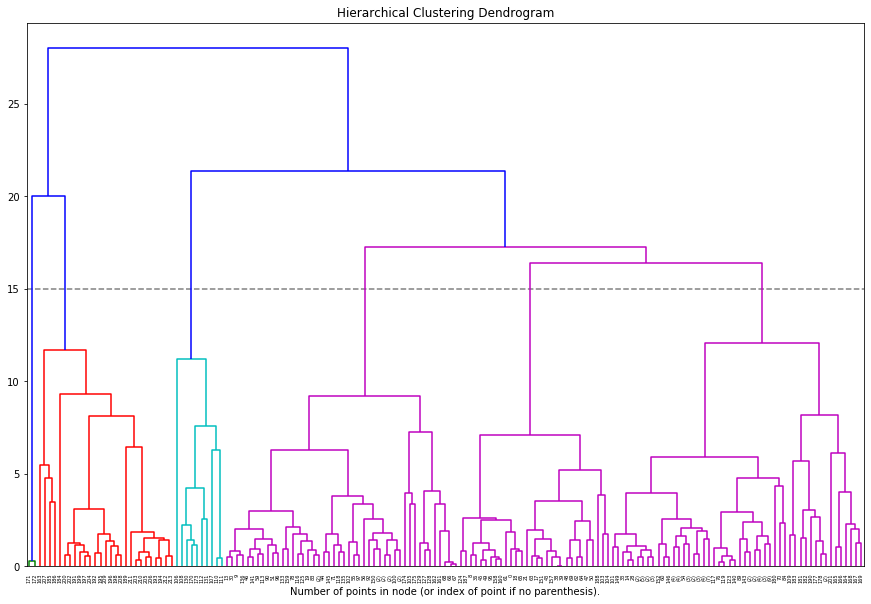

Cluster 0
	 ({2: 38, 1: 32, 3: 8, 6: 8, 5: 6, 7: 2})
Cluster 1
	 ({7: 25, 5: 1, 6: 1})
Cluster 2
	 ({2: 8, 5: 2})
Cluster 3
	 ({5: 2})
Cluster 4
	 ({2: 26, 1: 18, 3: 5, 5: 2})
Cluster 5
	 ({1: 20, 2: 4, 3: 4, 7: 2})


In [65]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram (source: scikit documentation)
    
    
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
linkage_list = ['ward', 'average', 'complete', 'single']
d_th = 15
model_agg = AgglomerativeClustering(distance_threshold=d_th, n_clusters=None, linkage=linkage_list[0])

model_agg = model_agg.fit(X_scaled)

fig, ax = plt.subplots(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model_agg, truncate_mode='level', p=10, ax=ax)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(d_th, linestyle='--', color='gray', zorder=-1)
plt.show()

glass['cluster_agg'] = model_agg.labels_
print_cluster_purity(glass, 'cluster_agg')

# Aprendizaje supervisado 

# Regresión

# Clasificación

Usaremos algunos algoritmos de clasificación de Sklearn:

 - [SVM, Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)
 
 - [KNN, K nearest neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier),  [Info](https://scikit-learn.org/stable/modules/neighbors.html#nearest-centroid-classifier)
 
 - [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
 
 - [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier)
 
 ---
 

Comunmente se pretende entrenar un modelo y despues evaluar como de bueno es.

Para esto podemos dividir los datos. Esto podemos hacerlo mediante [*train_test_split*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de Sklearn.

In [236]:

# Fracción de los datos reservados para la validación.
test_size = 0.2

# La variable a clasificar.
tarjet_values = glass['Type']

# Datos separados por entrenamiento / validación
X_train, X_test, y_train, y_test = train_test_split(X_scaled, tarjet_values, test_size=test_size, random_state = 7)
# La variable random_state se introduce para reproducibilidad. 

In [249]:
print(f'Numero de instancias \n\t Entrenamiento\t {X_train.shape[0]:3d}\n\t Validación\t {X_test.shape[0]:3d}')
print()
print(f'Porcentaje Validación {(X_test.shape[0]/X_scaled.shape[0]):1.3f}')

Numero de instancias 
	 Entrenamiento	 171
	 Validación	  43

Porcentaje Validación 0.201


Cargaremos diversos modelos, los entrenaremos mediante [Cross Validation](https://towardsdatascience.com/cross-validation-430d9a5fee22) y veremos como han desempeñado en los datos de entrenamiento.

    La CV o validación cruzada consiste en dividir los datos en $k$ diferentes particiones de misma dimension (número de muestras). Los modelos se entrenan con una parte de los datos y se evaluan en la otra. Se obtiene una media y desviación de la métrica deseada (comunmente la exactitud o *accuracy*). Queremos una alta exactitud media y una baja dispersión.
    
Usaremos *StratifiedKfolds* y *cross_val_score* para 

In [195]:

seed = 10
n_estimators = 200

model_list = [ ('SVC', SVC(random_state=seed)), 
               ('KNN',  KNeighborsClassifier()),
               ('DT', DecisionTreeClassifier()),
               ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators))]

results, names, times  = [], [] , []
n_folds = 4
scoring_list = ['accuracy', 'precision', 'recall']
scoring = 'accuracy'

# Inicializamos dataframe para 
results_pd = pd.DataFrame([], index = [model[0] for model in model_list], columns=['mean_accuracy (%)', 'std_accuracy (%)', 'cpu_time (s)'])

for clf_name, clf_model in model_list:

    start = time() # Empezamos el crono

    # Creamos objeto de K particiones
    kfold = StratifiedKFold(n_splits=n_folds, random_state=seed, shuffle=True)
    # Resultados para el entrenamiento con *n_folds* particiones
    cv_results = cross_val_score(clf_model, X_train, y_train, cv=kfold, scoring = scoring, n_jobs=-1) 


    t_elapsed = time() - start # Calcular tiempo
    
    # Almacenar resultados
    results.append(cv_results) # Score
    names.append(clf_name)     # Nombre de clasificador
    times.append(t_elapsed)    # Tiempo de computación

    
    results_pd.loc[clf_name,:]=[100*cv_results.mean(), 100*cv_results.std(), t_elapsed ]
    
    msg = f'{clf_name}-{scoring}: \t{100*cv_results.mean():3.2f} +- {100*cv_results.std():3.2f} % \t [{t_elapsed} s]'
    print(msg)


SVC-accuracy: 	67.24 +- 3.62 % 	 [0.031243324279785156 s]
KNN-accuracy: 	64.53 +- 5.29 % 	 [0.01562047004699707 s]
DT-accuracy: 	63.71 +- 12.96 % 	 [0.015620708465576172 s]
RF-accuracy: 	73.86 +- 2.33 % 	 [0.3884427547454834 s]


In [196]:
results_pd

,mean_accuracy (%),std_accuracy (%),cpu_time (s)
SVC,67.2365,3.62059,0.0312433
KNN,64.5299,5.28603,0.0156205
DT,63.7108,12.9565,0.0156207
RF,73.8604,2.32656,0.388443


### Ajuste de hiperparámetros: GridSearchCV

Vamos a probar diferentes valores de parámetros de un RF.

In [269]:
# Creamos el objeto clasificador
RF_cls = RandomForestClassifier()


# Introducimos varias metricas a modo de ejemplo, tan solo usaremos 'accuracy'
#  Las otras dos las dejo para futuro uso
scoring_dict = {"accuracy":  make_scorer(accuracy_score), 
                "recall":    make_scorer(recall_score,    average="weighted"),
                "precision": make_scorer(precision_score, average="weighted")}
# Las métricas recall y precisión requieren especificar el parámetro average para problemas
#  multiclase

# Introduciomos los parámetros sobre los que buscaremos
tuned_parameters = {
    'n_estimators': [100, 200, 300, 400], # number of estimators
    #'criterion': ['gini', 'entropy'],    # splitting criterion
    'max_features':[0.05 , 0.1],          # maximum features used at each split
    'max_depth': [None, 5],               # max depth of the trees
    'min_samples_split': [0.005, 0.01],   # mininal samples in leafs
    }

# Especificamos el clasificador, los valores de parámetros, la métrica a usar, las K particiones para el CV y
#  usamos todos los procesadores del ordenador (njobs=-1, numero de trabajos en paralelo)
k_folds = 4
tuned_RF =  GridSearchCV(RF_cls, param_grid = tuned_parameters, scoring = scoring_dict['accuracy'], cv=k_folds, n_jobs=-1)

# Entrenamos para *k_folds* particiones y *tuned_parameters* malla de parámetros
tuned_RF.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5], 'max_features': [0.05, 0.1],
                         'min_samples_split': [0.005, 0.01],
                         'n_estimators': [100, 200, 300, 400]},
             scoring=make_scorer(accuracy_score))

Esto nos devuelve como veis un GridSearchCV, que tiene atributos

In [261]:
[attr for attr in dir(tuned_RF) if '__' not in attr]

['_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 'set_params',
 'transform',
 'verbose']

In [256]:
tuned_RF.best_estimator_

RandomForestClassifier(max_features=0.1, min_samples_split=0.01,
                       n_estimators=300)

In [257]:
tuned_RF.cv_results_

{'mean_fit_time': array([0.14908546, 0.27890319, 0.47095716, 0.70415729, 0.16582334,
        0.30010939, 0.47633469, 0.6424318 , 0.16171855, 0.29711807,
        0.61474818, 0.64790469, 0.14803153, 0.37406564, 0.55442089,
        0.68279034, 0.17039615, 0.44262999, 0.57217008, 0.72507274,
        0.1736477 , 0.30471683, 0.43290406, 0.5734849 , 0.15148193,
        0.40305036, 0.51105464, 0.7256456 , 0.19287503, 0.377877  ,
        0.44644654, 0.58700657]),
 'std_fit_time': array([0.00914073, 0.00832114, 0.00835548, 0.01445859, 0.00786493,
        0.00800933, 0.02750493, 0.01658586, 0.01186647, 0.01505596,
        0.04201937, 0.03580855, 0.00828019, 0.01611874, 0.01159653,
        0.01025783, 0.01371943, 0.01473541, 0.02533847, 0.02403158,
        0.00784573, 0.01096724, 0.00712165, 0.01062993, 0.00716527,
        0.01538994, 0.02117806, 0.02096453, 0.00809815, 0.00995392,
        0.00415028, 0.01340512]),
 'mean_score_time': array([0.01408887, 0.02774698, 0.03773135, 0.054941  , 0.018117

**Extraigamos y ordenemos los resultados**

In [282]:

def GS_results2pandas(tuned_GS):
    # La media de la métrica escogida (del CV) para cada combinación de parámetros
    means = tuned_GS.cv_results_['mean_test_score']
    # La desviación estandar de la métrica escogida (del CV) para cada combinación
    stds = tuned_GS.cv_results_['std_test_score']


    # Inicializamos un dataframe
    #   > Instancias igual al número de combinaciones de parámetros
    #   > Las columnas serán la "media de la métrica para el CV", "la desviación de la métrica"
    #      y cada uno de los hiperparámetros

    gridCV_results_pd = pd.DataFrame([], index=np.arange(len(means)), 
                                     columns=['mean_score', 'std_score'] + list(tuned_GS.cv_results_['params'][0].keys()) )

    # 'tuned_RF.cv_results_['params'][0].keys()' es equivalente a *tuned_parameters.keys()*


    # Vayamos por cada valor de interes para volcarlo todo al pandas de resultados
    current_row = 0
    for mean, std, params in zip(means, stds, tuned_GS.cv_results_['params']):

        # Añadimos el resultado de la métrica (Accuracy, ...)
        gridCV_results_pd.loc[current_row, 'mean_score'] = mean
        gridCV_results_pd.loc[current_row, 'std_score']  = std

        # Añadimos los hiperparámetros 
        for col in params.keys():
            gridCV_results_pd.loc[current_row, col] = params[col] 

        #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        #print("")
        # Siguiente fila (combinación de parámetros)
        current_row += 1
    return(gridCV_results_pd.sort_values(by=['mean_score', 'std_score'],ascending=[False, True]))

In [283]:
GS_results2pandas(tuned_RF)

,mean_score,std_score,max_depth,max_features,min_samples_split,n_estimators
14,0.813123,0.0456962,None,0.1,0.01,300
0,0.807171,0.054977,None,0.05,0.005,100
4,0.795681,0.0434759,None,0.05,0.01,100
1,0.795543,0.0405937,None,0.05,0.005,200
10,0.789729,0.0355635,None,0.1,0.005,300
5,0.789729,0.0455632,None,0.05,0.01,200
6,0.789729,0.0585499,None,0.05,0.01,300
7,0.789729,0.0585499,None,0.05,0.01,400
3,0.78959,0.0361144,None,0.05,0.005,400
9,0.78959,0.0361144,None,0.1,0.005,200


In [287]:
RF_final = tuned_RF.best_estimator_
RF_final

RandomForestClassifier(max_features=0.1, min_samples_split=0.01,
                       n_estimators=300)

¿Cuánto mejorara otro clasificador mediante esta técnica?

¡Pruebalo!

En la documentación aparecen los parámetros. Repite el proceso con ellos.

### Validación

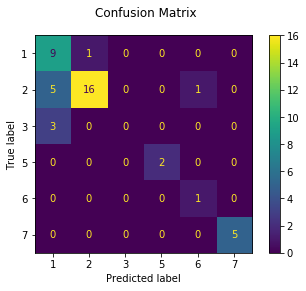

In [291]:

predicted = RF_final.predict(X_test)

disp = metrics.plot_confusion_matrix(RF_final, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [292]:
print("Classification report for classifier %s:\n%s\n"
      % (clf_svm, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(gamma=0.1):
              precision    recall  f1-score   support

           1       0.53      0.90      0.67        10
           2       0.94      0.73      0.82        22
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         5

    accuracy                           0.77        43
   macro avg       0.66      0.77      0.69        43
weighted avg       0.78      0.77      0.75        43




C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
